<a href="https://colab.research.google.com/github/Trektonian/Melbourne-Housing-Analysis/blob/main/Melbourne_housing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis On Melbourne Housing

By: Trekton Christiansen



## About the data

Melbourne, Australia's second-largest city, is known for its vibrant cultural scene, diverse population, and beautiful parks. It boasts iconic landmarks like Federation Square and the Royal Botanic Gardens, as well as a thriving coffee culture. Melbourne is famous for its sports passion, hosting events like the Australian Open and Melbourne Cup, making it a dynamic and cosmopolitan destination.

I will be conducting an exploratory data analysis of the trends in the housing market and try to determine trends that might be useful to an investor.

## Analysis

First, I will take a look at the data, and also import the proper libraries to make charts for visualization.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,house,1035000,property sold,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,5 Charles St,3,house,1465000,property sold prior,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,55a Park St,4,house,1600000,vendor bid,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,124 Yarra St,3,house,1876000,property sold,Nelson,7/5/2016,2.5,3067,4,2,0.0,245,210.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,98 Charles St,2,house,1636000,property sold,Nelson,8/10/2016,2.5,3067,2,1,2.0,256,107.0,1890.0,Yarra,Northern Metropolitan,4019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6847 non-null   object 
 1   Address        6847 non-null   object 
 2   Rooms          6847 non-null   int64  
 3   Type           6847 non-null   object 
 4   Price          6847 non-null   int64  
 5   Method         6847 non-null   object 
 6   SellerG        6847 non-null   object 
 7   Date           6847 non-null   object 
 8   Distance       6847 non-null   float64
 9   Postcode       6847 non-null   int64  
 10  Bedroom2       6847 non-null   int64  
 11  Bathroom       6847 non-null   int64  
 12  Car            6819 non-null   float64
 13  Landsize       6847 non-null   int64  
 14  BuildingArea   6847 non-null   float64
 15  YearBuilt      6847 non-null   float64
 16  CouncilArea    6187 non-null   object 
 17  Regionname     6847 non-null   object 
 18  Property

### Land size and Price

Fist we will look at the landsizes on the market and see if they indicate what price a property might be.

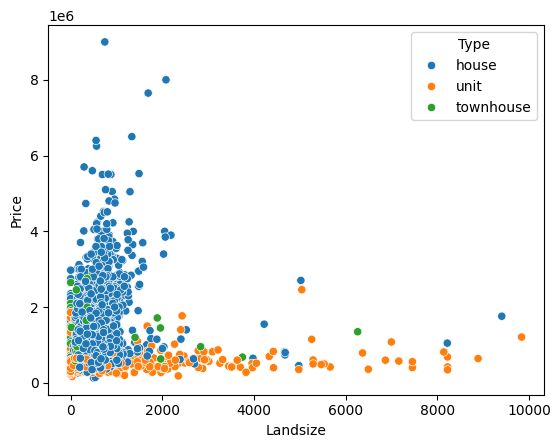

In [ ]:
sns.scatterplot(x='Landsize', y='Price', data=df, hue= 'Type') # creates a scatter plot with landsize and the price and colors the points with the type
plt.show() # displays the chart

In the graph created previously, two distinct patterns appear where one type of property experiences a price increase with just a slight increase in land size and another type of property experiences only small price increases as land size increases. It appears that as land size goes up, listings for houses sharply increase. Whereas with units, it only slightly goes up.

### Average Price and Year Built

Next we will look at the trend of the average price over the years.

In [ ]:
avg_ppy_built = df[['YearBuilt', 'Price']].groupby('YearBuilt').mean('Price').reset_index()
# aggregated the price column to find the average, and grouped by the year built.
avg_ppy_built

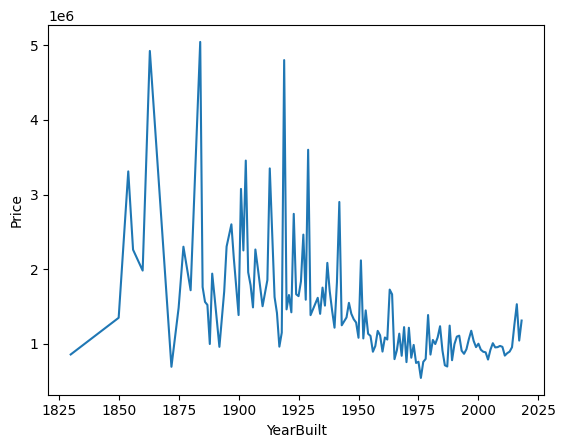

In [ ]:
# creates a line chart to visualize the price change over time in years.
sns.lineplot(x= 'YearBuilt', y= 'Price', data= avg_ppy_built)
plt.show()

If we look closely at the chart above, we can see that newer properties tend to have lower prices then older properties from 100 years ago.

### Average Price and Region

Similarly we can look at the average price per each region and see the how expensive each location tends to be.

In [ ]:
avg_ppy_region = df[['Regionname', 'Price']].groupby('Regionname').mean('Price').reset_index()
# aggregated the price column to find the average and grouped by the region name.
avg_ppy_region

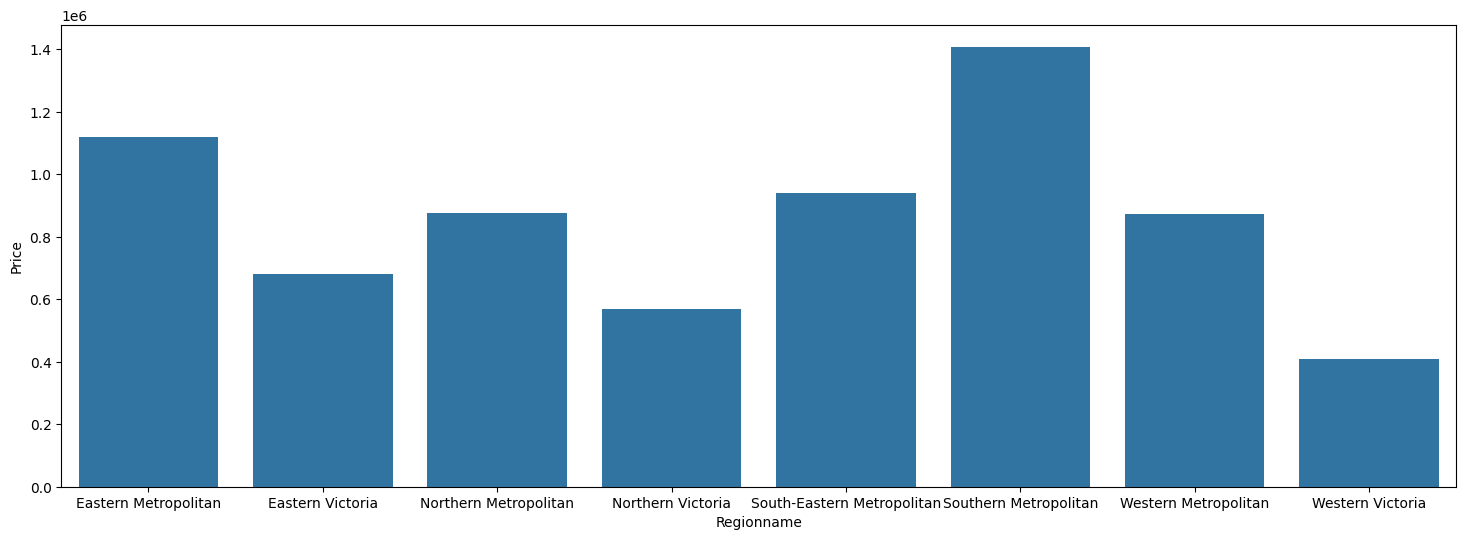

In [ ]:
plt.figure(figsize=(18,6)) # changed the size of the chart to allow for the names to be seen.

sns.barplot(data= avg_ppy_region, x= 'Regionname', y= 'Price')
plt.show()

Using a bar graph, we can quickly see that the Southern Metropolitan region of Melbourne tends to have the highest price on average. reagions like northern and wester Victoria tend have lower prices on average.

### Price Histogram

Creating a histogram of the price can help us determine where the majority of the data lies and can help us see outliers.

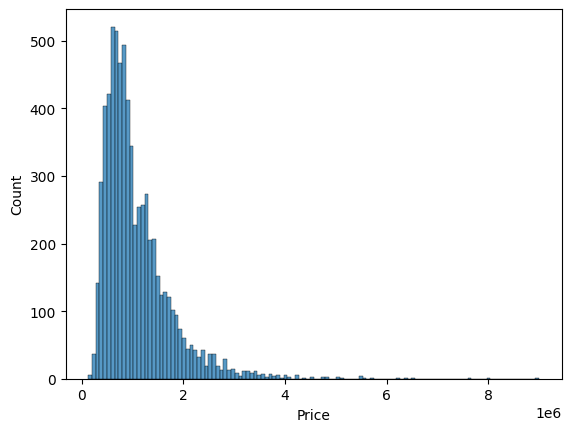

In [ ]:
# creates a histogram of how many properties were listed at what price.
sns.histplot(data= df, x= 'Price')
plt.show()

Judging from the histogram chart, we can see that most properties are priced under 2 million. The data scews to the right because there a some properties in the 6 to 8 million range.

### Region and Year Built

Next, we can visualize the which region and years the properties were built in. Doing this can help us see development trends in the city.

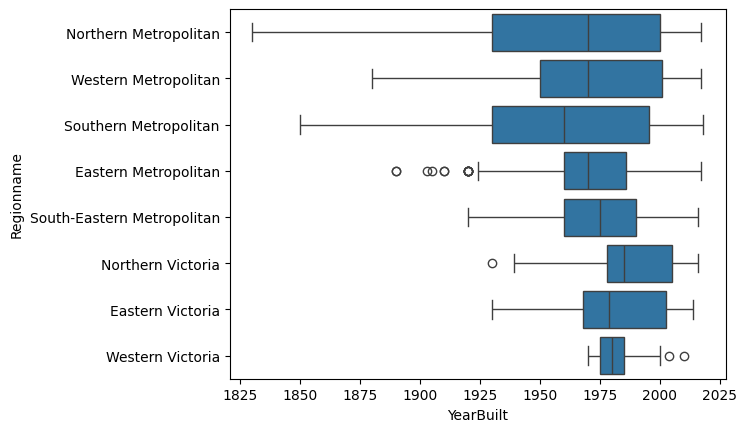

In [ ]:
# using the box plot to find the year built and compare it to the region's name.
sns.boxplot(data= df, x= 'YearBuilt', y= 'Regionname')
plt.show()

If we take a good gander at this chart, we can see that the Northern Metropolitan has consistently built new properties, whereas a region such as Western Victoria appears newer, and has seemingly stopped any meaningful development since the year 2000.

## Conclusion

Hopefully this visualization of housing property trends in Melbourne can help one to make decisions about development, realty, or purchasing.